In [7]:
# from : https://github.com/corazzon/OpenDataWrangling/blob/master/park.ipynb
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *
import re

# 지도 표현을 위해
import folium

In [9]:
park = pd.read_csv('../data/city_park.csv')
park.shape

(16096, 19)

In [10]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,NaN,NaN,NaN,NaN,NaN,1990-12-31,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,NaN,NaN,NaN,NaN,NaN,1990-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,NaN,NaN,NaN,NaN,NaN,1991-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,광주광역시 북구 일곡동 850-1,35.207975,126.895445,34840.3,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,광주광역시 북구 일곡동 820-2,35.206500,126.898395,10315.0,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구


In [11]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 19 columns):
관리번호            16096 non-null object
공원명             16096 non-null object
공원구분            16096 non-null object
소재지도로명주소        8321 non-null object
소재지지번주소         15213 non-null object
위도              16096 non-null float64
경도              16096 non-null float64
공원면적            16096 non-null float64
공원보유시설(운동시설)    4164 non-null object
공원보유시설(유희시설)    6085 non-null object
공원보유시설(편익시설)    4344 non-null object
공원보유시설(교양시설)    914 non-null object
공원보유시설(기타시설)    2503 non-null object
지정고시일           13512 non-null object
관리기관명           15381 non-null object
전화번호            14966 non-null object
데이터기준일자         16096 non-null object
제공기관코드          16096 non-null object
제공기관명           16096 non-null object
dtypes: float64(3), object(16)
memory usage: 2.3+ MB


In [12]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         7775
소재지지번주소           883
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    11932
공원보유시설(유희시설)    10011
공원보유시설(편익시설)    11752
공원보유시설(교양시설)    15182
공원보유시설(기타시설)    13593
지정고시일            2584
관리기관명             715
전화번호             1130
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

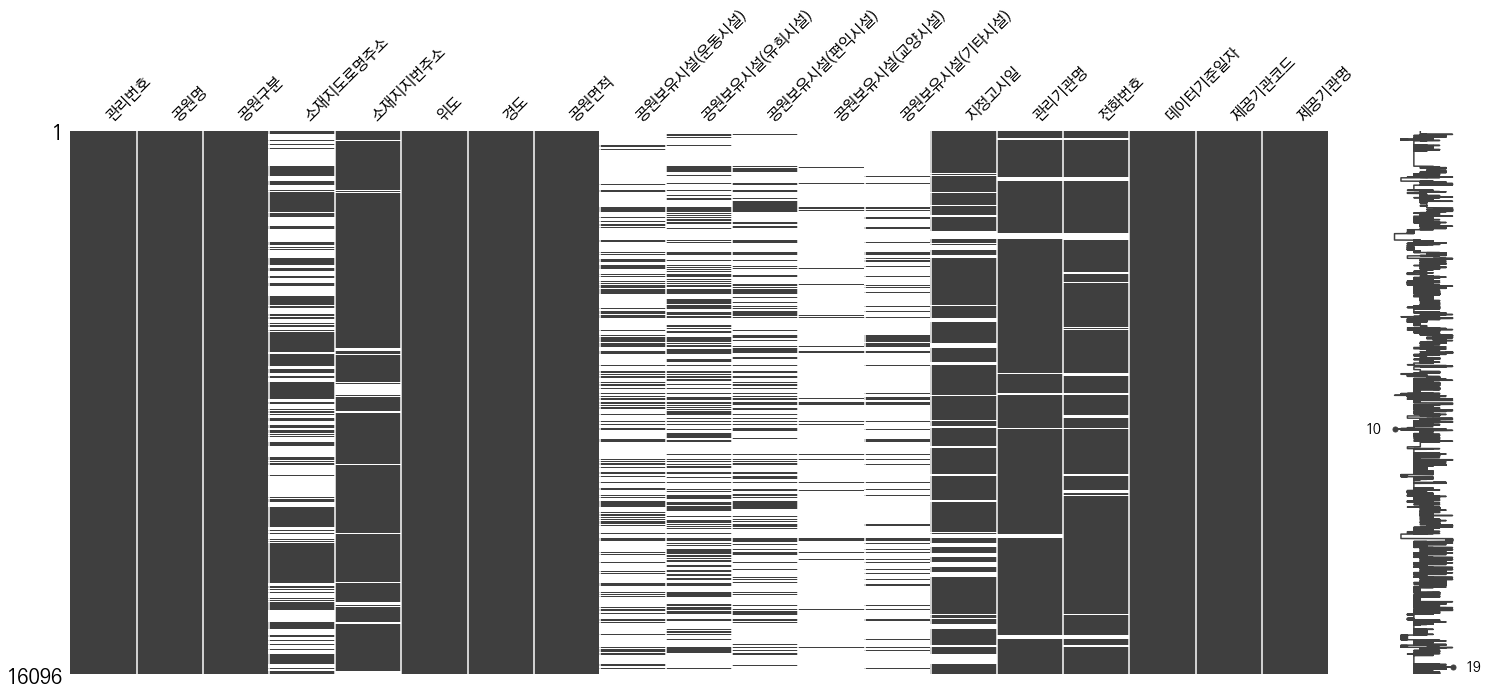

In [13]:
import missingno as msno
plt.rcParams["font.family"] = 'KoPubDotum'
plt.rcParams["font.weight"] = 'medium'

msno.matrix(park)

In [14]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [17]:
# 사용하지 않는 열 제거
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)', '공원보유시설(기타시설)', '지정고시일', '관리기관명', '제공기관코드', '제공기관명'], inplace=True)

In [18]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '전화번호', '데이터기준일자'],
      dtype='object')

In [19]:
park.shape

(16096, 10)

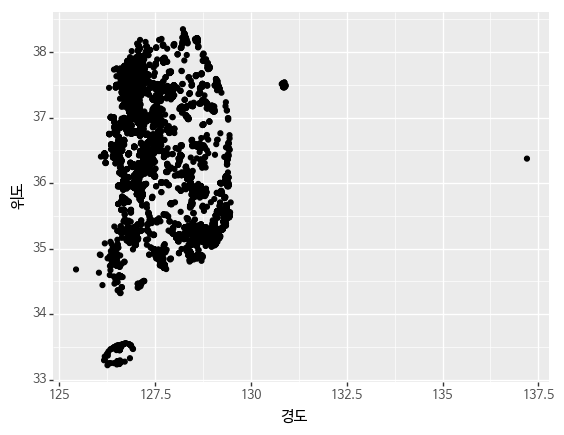

<ggplot: (-9223371893568552069)>

In [22]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [25]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
dtype: object

In [26]:
# 천단위 쉼표가 있다면 이를 제거하고 (물론 이 경우 문자열)
# park['공원면적'] = park['공원면적'].str.replace(',', '').astype(float)
park['공원면적'].head()

0     87710.3
1     13383.5
2    170920.6
3     34840.3
4     10315.0
Name: 공원면적, dtype: float64

In [27]:
# 도로명 주소의 널값 수
park['소재지도로명주소'].isnull().sum()

7775

In [28]:
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(7775, 10)

In [29]:
# 널값(NaN)의 결측처리?
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace = True)

In [30]:
park['소재지도로명주소'].isnull().sum()

0

In [31]:
park_loc = park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())]
park_loc.shape

(0, 10)

In [43]:
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park.head(3)
park['시도'] = park['시도'].str.replace('\"', '')

In [33]:
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,시도,구군
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,062-410-6438,2018-04-17,광주광역시,북구
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,062-410-6438,2018-04-17,광주광역시,북구
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,062-410-6438,2018-04-17,광주광역시,북구


In [44]:
park[['위도', '경도']].describe()

,위도,경도
count,16096.000000,16096.000000
mean,36.393299,127.583975
std,1.034441,0.896596
min,33.218666,125.432215
25%,35.488614,126.900125
50%,36.403171,127.150142
75%,37.419200,128.512760
max,38.350990,137.202661


In [45]:
# 일정 값이 이상의 값 제거
park_loc_notnull = park.loc[(park['위도'] > 32 ) & (park['경도'] < 132) & park['시도'].notnull()]
park_loc_notnull.shape

(16095, 12)

In [46]:
park.loc[(park['위도'] < 26 ) | (park['경도'] >= 132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,시도,구군
840,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-7233,2018-08-16,충청북도,청주시


In [47]:
park_loc_notnull['시도'].value_counts()

경기도        3250
경상남도       1814
충청남도       1708
서울특별시      1330
전라북도       1138
전라남도        925
충청북도        910
울산광역시       833
경상북도        785
강원도         724
대구광역시       580
부산광역시       530
인천광역시       507
대전광역시       384
광주광역시       362
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

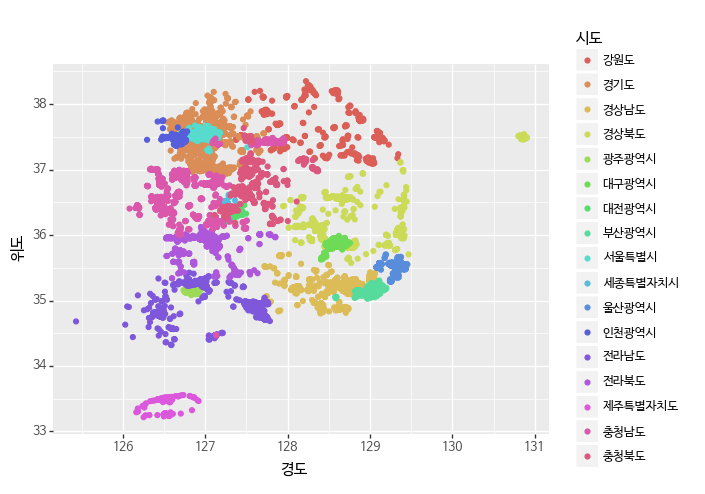

<ggplot: (-9223371893568478618)>

In [48]:
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

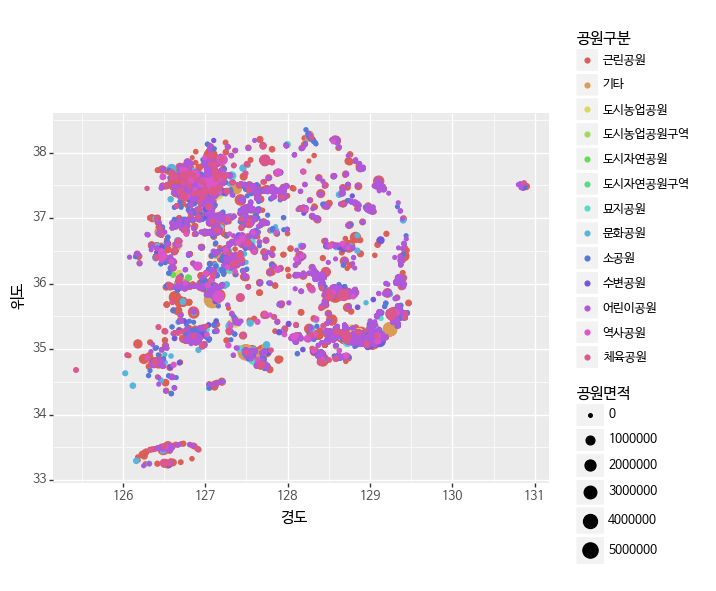

<ggplot: (-9223371893568270574)>

In [51]:
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

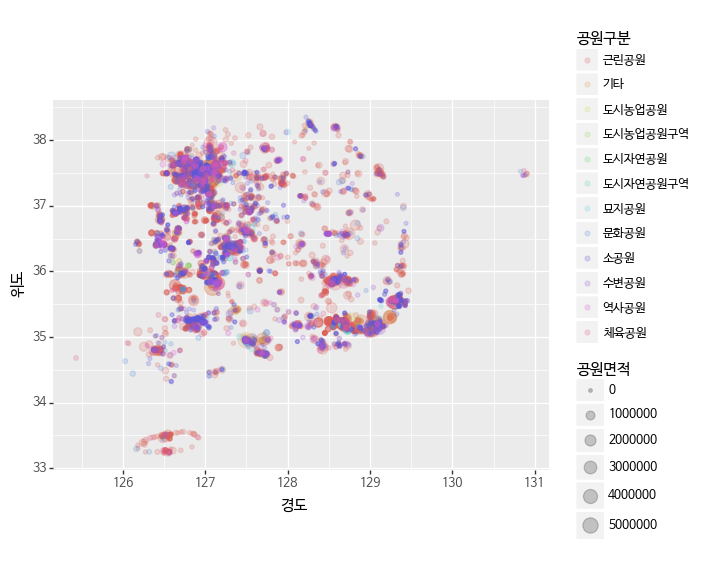

<ggplot: (-9223371893563886760)>

In [54]:
# 어린이공원을 제외하고 찍어보도록 합니다.
# 다음으로 많은 근린공원과 소공원이 많이 보입니다.
(ggplot(park_loc_notnull.loc[park_loc_notnull['공원구분'] != '어린이공원'])  + 
 aes(x='경도', y='위도', color='공원구분', size='공원면적')  + 
 geom_point(alpha=0.2)  + 
 theme(text=element_text(family='NanumBarunGothic'))
)

In [55]:
# 시도별로 합계 데이터를 출력
park_do = pd.DataFrame(park['시도'].value_counts())
park_do_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index()
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by=['합계'], ascending=False)
park_sido

,시도,합계,비율
0,경기도,3250,0.201914
1,경상남도,1814,0.112699
2,충청남도,1708,0.106113
3,서울특별시,1330,0.082629
4,전라북도,1138,0.070701
5,전라남도,925,0.057468
6,충청북도,911,0.056598
7,울산광역시,833,0.051752
8,경상북도,785,0.048770
9,강원도,724,0.044980


In [63]:
park_sido.sort_values(by=['합계'], ascending=False)

,시도,합계,비율
0,경기도,3250,0.201914
1,경상남도,1814,0.112699
2,충청남도,1708,0.106113
3,서울특별시,1330,0.082629
4,전라북도,1138,0.070701
5,전라남도,925,0.057468
6,충청북도,911,0.056598
7,울산광역시,833,0.051752
8,경상북도,785,0.048770
9,강원도,724,0.044980


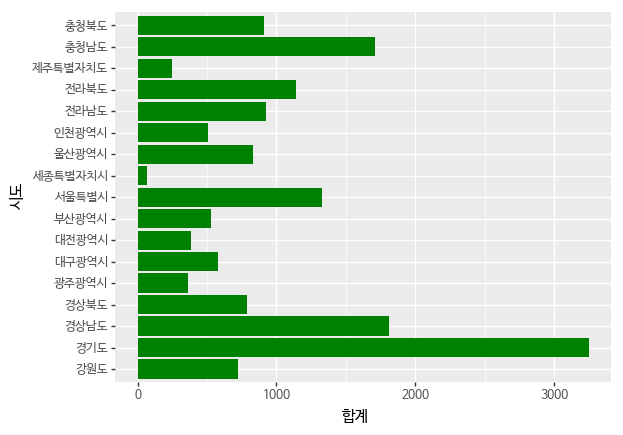

<ggplot: (143285812358)>

In [65]:
# 경기도가 압도적으로 많음
(ggplot(park_sido.sort_values(by=['합계'], ascending=False))
 + aes(x='시도', y='합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [60]:
# value_counts() : normalize
park['시도'].value_counts()

경기도        3250
경상남도       1814
충청남도       1708
서울특별시      1330
전라북도       1138
전라남도        925
충청북도        911
울산광역시       833
경상북도        785
강원도         724
대구광역시       580
부산광역시       530
인천광역시       507
대전광역시       384
광주광역시       362
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

In [58]:
park['시도'].value_counts(normalize=True)

경기도        0.201914
경상남도       0.112699
충청남도       0.106113
서울특별시      0.082629
전라북도       0.070701
전라남도       0.057468
충청북도       0.056598
울산광역시      0.051752
경상북도       0.048770
강원도        0.044980
대구광역시      0.036034
부산광역시      0.032927
인천광역시      0.031499
대전광역시      0.023857
광주광역시      0.022490
제주특별자치도    0.015221
세종특별자치시    0.004349
Name: 시도, dtype: float64

In [59]:
park['시도'].value_counts(normalize=True)

세종특별자치시    0.004349
제주특별자치도    0.015221
광주광역시      0.022490
대전광역시      0.023857
인천광역시      0.031499
부산광역시      0.032927
대구광역시      0.036034
강원도        0.044980
경상북도       0.048770
울산광역시      0.051752
충청북도       0.056598
전라남도       0.057468
전라북도       0.070701
서울특별시      0.082629
충청남도       0.106113
경상남도       0.112699
경기도        0.201914
Name: 시도, dtype: float64